In [27]:
import osmnx as ox
import plotly.graph_objs as go
import plotly.offline as offline

# Substitua 'your_mapbox_token' pelo seu token de acesso do Mapbox
mapbox_token = 'your_mapbox_token'

# Nome do bairro e nome da cidade (São José dos Pinhais, Brasil)
bairro = "Centro"
cidade = "São José dos Pinhais, Brasil"

# Obter os dados geoespaciais do bairro usando o OSM
bairro_data = ox.geocode_to_gdf(bairro + ", " + cidade)

# Calcular o centro do bairro
centro_bairro = bairro_data.geometry.centroid

# Obter o polígono que representa a delimitação do bairro
poligono_bairro = bairro_data["geometry"].iloc[0]

# Layout do mapa
layout = go.Layout(
    mapbox_style='mapbox://styles/mapbox/streets-v11',
    mapbox_accesstoken=mapbox_token,
    mapbox_zoom=13,
    mapbox_center={'lat': centro_bairro.y.iloc[0], 'lon': centro_bairro.x.iloc[0]},
    autosize=True,
    margin=dict(l=0, r=0, t=0, b=0)  # Define as margens (esquerda, direita, topo, base) para 0
)

# Dados dos marcadores
data = [
    go.Scattermapbox(
        lat=[centro_bairro.y.iloc[0]],   # Latitudes dos marcadores (usando o centro do bairro)
        lon=[centro_bairro.x.iloc[0]],   # Longitudes dos marcadores (usando o centro do bairro)
        mode='markers',                    # Modo de exibição dos marcadores
        marker=go.scattermapbox.Marker(
            size=10,                        # Tamanho dos marcadores
            color='rgb(255, 0, 0)'          # Cor dos marcadores (vermelho)
        ),
        text=[bairro],  # Texto ao passar o mouse sobre os marcadores (usando o nome do bairro)
    ),
    go.Scattermapbox(
        lat=list(poligono_bairro.exterior.coords.xy[1]),   # Latitudes do polígono
        lon=list(poligono_bairro.exterior.coords.xy[0]),   # Longitudes do polígono
        mode='lines',   # Modo de exibição do polígono (linhas)
        fill='toself',  # Preencher o interior do polígono
        fillcolor='rgba(0, 128, 0, 0.2)',  # Cor de preenchimento do polígono (verde com transparência)
        line=dict(color='rgb(0, 128, 0)', width=2)  # Estilo da linha do polígono (verde)
    )
]

# Figura do mapa
fig = go.Figure(data=data, layout=layout)

# Exibe o mapa
fig.show()
offline.plot(fig, filename='mapa_interativo.html', auto_open=True)

C:\Users\Dantas\AppData\Local\Temp\ipykernel_18332\542389796.py:16: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




'mapa_interativo.html'

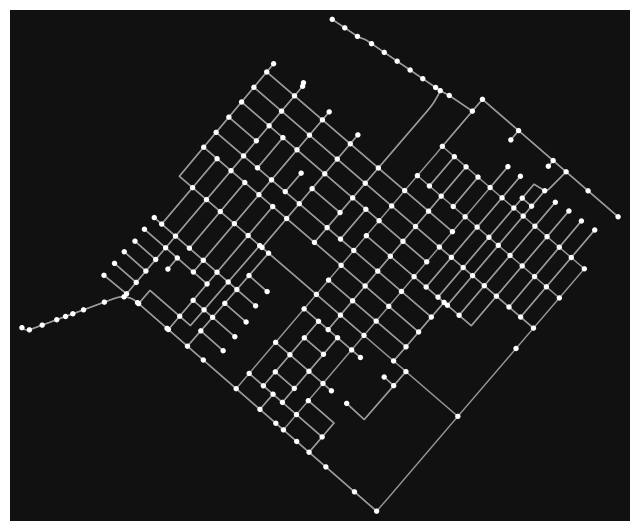

NetworkXError: G is not strongly connected

In [43]:
import osmnx as ox
import networkx as nx
import plotly.graph_objs as go
import plotly.offline as offline

# Substitua 'your_mapbox_token' pelo seu token de acesso do Mapbox
mapbox_token = 'your_mapbox_token'

# Nome do bairro e nome da cidade (São José dos Pinhais, Brasil)
bairro = "Afonso Pena"
cidade = "São José dos Pinhais, Brasil"

# Obter o grafo de ruas do bairro usando o OSM
G = ox.graph_from_place(bairro + ", " + cidade, network_type='drive')

# Calcular o centro do bairro
centro_bairro = ox.geocode(bairro + ", " + cidade)

# Plotar o grafo de ruas
ox.plot_graph(G)


# Calcular uma rota usando o TSP que passe por todas as ruas do bairro
rota = list(nx.approximation.traveling_salesman_problem(G))

# Obter as coordenadas dos pontos da rota
lats, lons = zip(*[(G.nodes[node]['y'], G.nodes[node]['x']) for node in rota])

# Layout do mapa
layout = go.Layout(
    mapbox_style='mapbox://styles/mapbox/streets-v11',
    mapbox_accesstoken=mapbox_token,
    mapbox_zoom=14,
    mapbox_center={'lat': centro_bairro[0], 'lon': centro_bairro[1]},
    autosize=True,
    margin=dict(l=0, r=0, t=0, b=0)  # Define as margens (esquerda, direita, topo, base) para 0
)

# Dados dos marcadores
data = [
    go.Scattermapbox(
        lat=[centro_bairro[0]],   # Latitude do marcador (usando o centro do bairro)
        lon=[centro_bairro[1]],   # Longitude do marcador (usando o centro do bairro)
        mode='markers',                    # Modo de exibição dos marcadores
        marker=go.scattermapbox.Marker(
            size=10,                        # Tamanho dos marcadores
            color='rgb(255, 0, 0)'          # Cor dos marcadores (vermelho)
        ),
        text=[bairro],  # Texto ao passar o mouse sobre os marcadores (usando o nome do bairro)
    ),
    go.Scattermapbox(
        lat=lats,   # Latitudes dos pontos da rota
        lon=lons,   # Longitudes dos pontos da rota
        mode='lines+markers',   # Modo de exibição da rota (linhas e marcadores)
        line=dict(color='rgb(0, 0, 255)', width=2)  # Estilo da linha da rota (azul)
    )
]

# Figura do mapa
fig = go.Figure(data=data, layout=layout)

# Exibe o mapa
fig.show()
offline.plot(fig, filename='rota_interativa.html', auto_open=True)


In [52]:
import osmnx as ox
import networkx as nx
import plotly.graph_objs as go
import plotly.offline as offline

# Substitua 'your_mapbox_token' pelo seu token de acesso do Mapbox
mapbox_token = 'your_mapbox_token'

# Nome do bairro e nome da cidade (São José dos Pinhais, Brasil)
bairro = "Afonso Pena"
cidade = "São José dos Pinhais, Brasil"

# Obter o grafo de ruas do bairro usando o OSM
G = ox.graph_from_place(bairro + ", " + cidade, network_type='drive')

# Calcular uma sequência de nós que minimize a distância total percorrida
rota = list(nx.approximation.traveling_salesman_problem(G.to_undirected()))

# Adicionar a primeira aresta de volta ao último nó para formar um ciclo
rota.append(rota[0])

# Obter as coordenadas dos pontos da rota
lats, lons = zip(*[(G.nodes[node]['y'], G.nodes[node]['x']) for node in rota])

# Calcular o centro do bairro
centro_bairro = ox.geocode(bairro + ", " + cidade)

# Layout do mapa
layout = go.Layout(
    mapbox_style='mapbox://styles/mapbox/streets-v11',
    mapbox_accesstoken=mapbox_token,
    mapbox_zoom=14,
    mapbox_center={'lat': centro_bairro[0], 'lon': centro_bairro[1]},
    autosize=True,
    margin=dict(l=0, r=0, t=0, b=0)  # Define as margens (esquerda, direita, topo, base) para 0
)

# Dados dos marcadores
data = [
    go.Scattermapbox(
        lat=[centro_bairro[0]],   # Latitude do marcador (usando o centro do bairro)
        lon=[centro_bairro[1]],   # Longitude do marcador (usando o centro do bairro)
        mode='markers',                    # Modo de exibição dos marcadores
        marker=go.scattermapbox.Marker(
            size=10,                        # Tamanho dos marcadores
            color='rgb(255, 0, 0)'          # Cor dos marcadores (vermelho)
        ),
        text=[bairro],  # Texto ao passar o mouse sobre os marcadores (usando o nome do bairro)
    ),
    go.Scattermapbox(
        lat=list(poligono_bairro.exterior.coords.xy[1]),   # Latitudes do polígono
        lon=list(poligono_bairro.exterior.coords.xy[0]),   # Longitudes do polígono
        mode='lines',   # Modo de exibição do polígono (linhas)
        fill='toself',  # Preencher o interior do polígono
        fillcolor='rgba(0, 128, 0, 0.2)',  # Cor de preenchimento do polígono (verde com transparência)
        line=dict(color='rgb(0, 128, 0)', width=2)  # Estilo da linha do polígono (verde)
    ),
    go.Scattermapbox(
        lat=lats,   # Latitudes dos pontos da rota
        lon=lons,   # Longitudes dos pontos da rota
        mode='lines+markers',   # Modo de exibição da rota (linhas e marcadores)
        line=dict(color='rgb(0, 0, 255)', width=2)  # Estilo da linha da rota (azul)
    )
]

# Figura do mapa
fig = go.Figure(data=data, layout=layout)

# Exibe o mapa
fig.show()
offline.plot(fig, filename='rota_interativa.html', auto_open=True)



SyntaxError: invalid syntax. Perhaps you forgot a comma? (1718879970.py, line 50)

In [31]:
import osmnx as ox
import networkx as nx
import plotly.graph_objs as go
import plotly.offline as offline

# Substitua 'your_mapbox_token' pelo seu token de acesso do Mapbox
mapbox_token = 'your_mapbox_token'

# Nome do bairro e nome da cidade (São José dos Pinhais, Brasil)
bairro = "Iná"
cidade = "São José dos Pinhais, Brasil"

# Obter o grafo de ruas do bairro usando o OSM
G = ox.graph_from_place(bairro + ", " + cidade, network_type='drive')

# Calcular uma sequência de nós que minimize a distância total percorrida
rota = list(nx.approximation.traveling_salesman_problem(G.to_undirected(), cycle=True))

# Adicionar a primeira aresta de volta ao último nó para formar um ciclo
rota.append(rota[0])

# Obter as coordenadas dos pontos da rota
lats, lons = zip(*[(G.nodes[node]['y'], G.nodes[node]['x']) for node in rota])

# Calcular o centro do bairro
centro_bairro = ox.geocode(bairro + ", " + cidade)

# Layout do mapa
layout = go.Layout(
    mapbox_style='mapbox://styles/mapbox/streets-v11',
    mapbox_accesstoken=mapbox_token,
    mapbox_zoom=14,
    mapbox_center={'lat': centro_bairro[0], 'lon': centro_bairro[1]},
    autosize=True,
    margin=dict(l=0, r=0, t=0, b=0)  # Define as margens (esquerda, direita, topo, base) para 0
)

# Dados dos marcadores
data = [
    go.Scattermapbox(
        lat=[centro_bairro[0]],   # Latitude do marcador (usando o centro do bairro)
        lon=[centro_bairro[1]],   # Longitude do marcador (usando o centro do bairro)
        mode='markers',                    # Modo de exibição dos marcadores
        marker=go.scattermapbox.Marker(
            size=10,                        # Tamanho dos marcadores
            color='rgb(255, 0, 0)'          # Cor dos marcadores (vermelho)
        ),
        text=[bairro],  # Texto ao passar o mouse sobre os marcadores (usando o nome do bairro)
    ),
    go.Scattermapbox(
        lat=lats,   # Latitudes dos pontos da rota
        lon=lons,   # Longitudes dos pontos da rota
        mode='lines+markers',   # Modo de exibição da rota (linhas e marcadores)
        line=dict(color='rgb(0, 0, 255)', width=2)  # Estilo da linha da rota (azul)
    )
]

# Figura do mapa
fig = go.Figure(data=data, layout=layout)

# Exibe o mapa
fig.show()
offline.plot(fig, filename='rota_interativa.html', auto_open=True)

'rota_interativa.html'

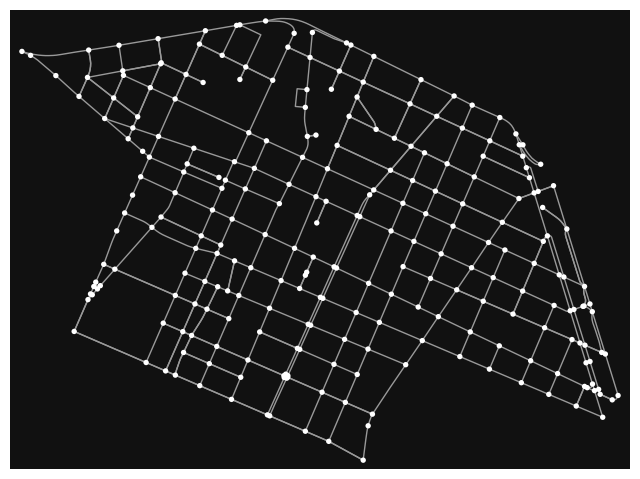

C:\Users\Dantas\AppData\Local\Temp\ipykernel_4692\2264706563.py:53: UserWarning:

The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.



In [75]:
import folium
import osmnx as ox
import networkx as nx
import plotly.graph_objs as go
import plotly.offline as offline
import requests

# Substitua 'your_mapbox_token' pelo seu token de acesso do Mapbox
mapbox_token = 'your_mapbox_token'

# Nome do bairro e nome da cidade (São José dos Pinhais, Brasil)
bairro = "Centro"
cidade = "São José dos Pinhais, Brasil"

# Obter o grafo de ruas do bairro usando o OSM
G = ox.graph_from_place(bairro + ", " + cidade, network_type='drive')

# Calcular o centro do bairro
centro_bairro = ox.geocode(bairro + ", " + cidade)

# Plotar o grafo de ruas
ox.plot_graph(G)

# Obter as coordenadas das ruas do grafo
nodes = list(G.nodes())
coordinates = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in nodes]

# Criar grupos de coordenadas com no máximo 25 coordenadas cada
max_coordinates_per_request = 25
coordinate_groups = [coordinates[i:i + max_coordinates_per_request] for i in range(0, len(coordinates), max_coordinates_per_request)]

# Função para chamar a API do Mapbox Directions
def get_directions(coordinates):
    base_url = 'https://api.mapbox.com/directions/v5/mapbox/driving/'
    waypoints = ';'.join([f'{coord[1]},{coord[0]}' for coord in coordinates])
    request_url = f'{base_url}{waypoints}?access_token={mapbox_token}&overview=full'
    response = requests.get(request_url)
    data = response.json()
    return data

# Obter as instruções de direção para cada grupo de coordenadas
route_instructions = []
for group in coordinate_groups:
    directions_data = get_directions(group)
    if 'routes' in directions_data and len(directions_data['routes']) > 0:
        # Extrair as instruções de direção para a rota
        instructions = [(step['maneuver']['instruction'], (step['maneuver']['location'][1], step['maneuver']['location'][0]))
                        for leg in directions_data['routes'][0]['legs']
                        for step in leg['steps']]
        route_instructions.extend(instructions)

# Plotar o grafo de ruas e a rota com as instruções de direção no mapa
G_mapbox = ox.plot_graph_folium(G, popup_attribute='name', edge_width=2)
for instruction, coord in route_instructions:
    folium.Marker(location=[coord[0], coord[1]], popup=instruction, icon=folium.Icon(color='blue')).add_to(G_mapbox)

# Salvar o mapa em um arquivo HTML
G_mapbox.save('route_map_with_directions.html')
